In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

In [32]:
df = pd.read_csv('out-tinystories-cluster-spectral/30.csv')
df.head()

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,label0,label1,label2,label3,label4,label5,label6,label7,token
0,"[0.0006011072546243668, -0.06450191140174866, ...","[0.0006011072546243668, -0.06450191140174866, ...","[0.05809622257947922, -2.568804979324341, 0.52...","[0.6596587300300598, -3.904742479324341, 0.478...","[1.649893045425415, -4.921343803405762, -0.018...","[3.483633279800415, -5.443316459655762, -0.156...","[5.161367416381836, -6.427691459655762, -1.149...","[2.138679027557373, -2.8108208179473877, -0.71...",2,2,0,0,0,0,0,0,Once
1,"[0.0800330638885498, -0.0733233243227005, -0.0...","[0.0800330638885498, -0.0733233243227005, -0.0...","[1.5746619701385498, -2.0153398513793945, 1.10...","[2.81684947013855, -3.4176836013793945, 2.6757...","[3.71528697013855, -3.5358476638793945, 2.2391...","[4.968705177307129, -2.7848711013793945, 3.088...","[7.101517677307129, -3.3830156326293945, 3.358...","[2.550734281539917, -1.4745920896530151, 1.035...",2,2,0,0,0,0,0,0,upon
2,"[0.024861622601747513, -0.014501634985208511, ...","[0.024861622601747513, -0.014501634985208511, ...","[0.7040608525276184, -1.015966534614563, 0.719...","[1.2450764179229736, -1.892919659614563, 1.208...","[1.7831623554229736, -1.5140132904052734, 1.18...","[3.8212482929229736, -1.0208492279052734, 1.17...","[6.3407793045043945, -1.6346187591552734, 1.55...","[3.1453158855438232, -0.9155108332633972, 1.26...",2,2,0,0,0,0,0,0,a
3,"[0.10966695100069046, -0.03712926432490349, 0....","[0.10966695100069046, -0.03712926432490349, 0....","[1.0232411623001099, -2.0177199840545654, -0.0...","[1.6355458498001099, -3.2696731090545654, 0.18...","[2.2859363555908203, -3.8468215465545654, -0.4...","[3.4499988555908203, -4.4112749099731445, -1.3...","[5.08671760559082, -6.3676958084106445, -2.469...","[2.135122776031494, -2.6436424255371094, -0.89...",2,2,0,0,0,0,0,0,time
4,"[0.053735148161649704, -0.08522026240825653, -...","[0.053735148161649704, -0.08522026240825653, -...","[0.8315366506576538, -0.9365386366844177, -0.8...","[1.2558530569076538, -1.2822418212890625, -1.5...","[1.4413999319076538, -1.1259918212890625, -2.3...","[1.0122007131576538, -0.3847808837890625, -3.4...","[1.3354429006576538, -1.6142730712890625, -4.0...","[0.25139617919921875, -0.621404230594635, -1.7...",2,2,0,0,0,0,0,0,there


In [33]:
len(df)

256

In [34]:
all_embs = []
for i in range(1, 8):
    all_embs.extend([eval(emb) for emb in df[f"emb{i}"]])

In [35]:
len(all_embs)

1792

In [36]:
from sklearn.neighbors import kneighbors_graph

n_neighbors = 15

# Create the affinity matrix manually
affinity_matrix = kneighbors_graph(all_embs, n_neighbors=n_neighbors, mode='connectivity', include_self=False).toarray()
affinity_matrix = np.clip(affinity_matrix + affinity_matrix.T, a_min = 0, a_max = 1)

In [37]:
# Compute the Laplacian matrix
degree_matrix = np.diag(np.sum(affinity_matrix, axis=1))  # Degree matrix

In [38]:
laplacian_matrix = degree_matrix - affinity_matrix

# Compute eigenvalues of the Laplacian matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

In [39]:
eig = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]

In [40]:
eig = sorted(eig, key=lambda x: x[0])

In [41]:
n_points = 256
x = {}
y = {}
z = {}

for i in range(1, 8):
    x[i] = []
    y[i] = []
    z[i] = []

    for j in range((i - 1) * n_points, i * n_points):
        x[i].append(eig[0][1][j])
        y[i].append(eig[1][1][j])
        z[i].append(eig[2][1][j])

In [42]:
def linear_combine(x1, y1, z1, x2, y2, z2, alpha):
    return [x1[i] * (1 - alpha) + x2[i] * alpha for i in range(0, len(x1))], [y1[i] * (1 - alpha) + y2[i] * alpha for i in range(0, len(y1))], [z1[i] * (1 - alpha) + z2[i] * alpha for i in range(0, len(z1))]

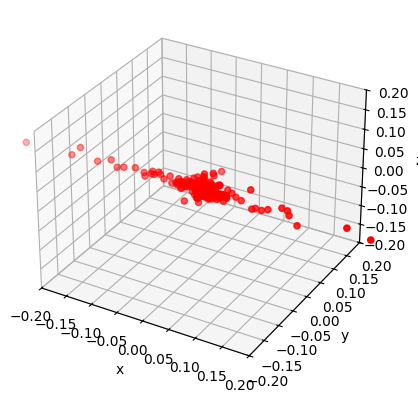

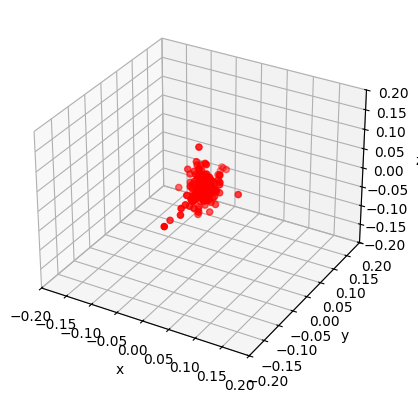

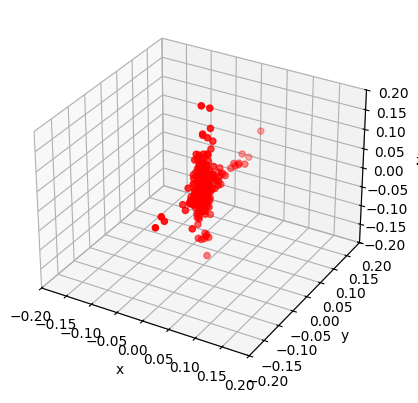

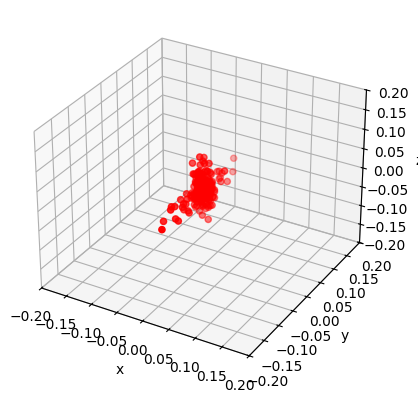

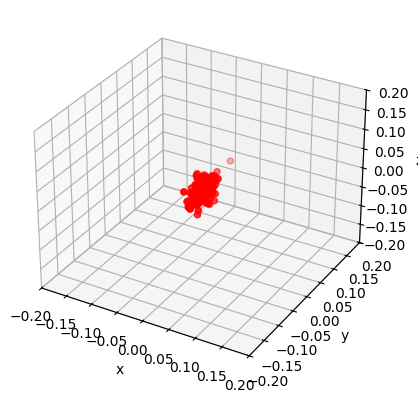

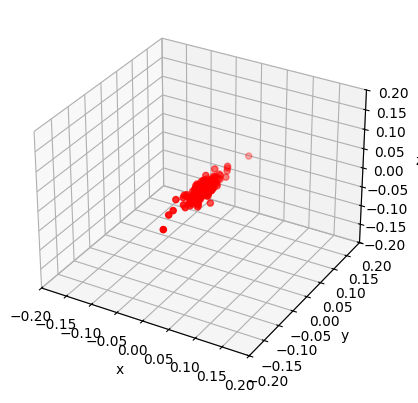

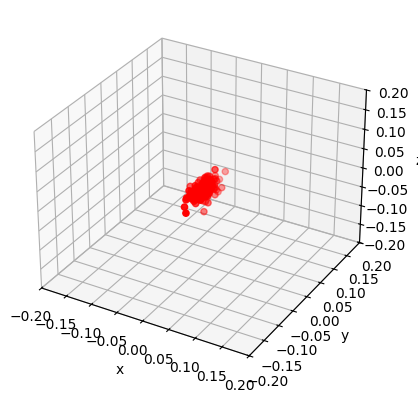

In [55]:
for i in range(1, 8):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Scatter plot
    ax.set_xlim(-0.2, 0.2)
    ax.set_ylim(-0.2, 0.2)
    ax.set_zlim(-0.2, 0.2)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.scatter(x[i], y[i], z[i], c='r', marker='o')

    # Show plot
    plt.show()

In [62]:
frame_count = 0

for i in range(1, 7):
    for alpha in np.arange(0, 1, 0.05):
        xp, yp, zp = linear_combine(x[i], y[i], z[i], x[i + 1], y[i + 1], z[i + 1], alpha)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        # Scatter plot
        ax.set_xlim(-0.2, 0.2)
        ax.set_ylim(-0.2, 0.2)
        ax.set_zlim(-0.2, 0.2)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.scatter(xp, yp, zp, c='b', marker='o')
        ax.set_title(str(np.round(i - 1 + alpha, 2)))
        plt.savefig(f"gif_plots_3d/frame{frame_count}.png")
        plt.close(fig)
        frame_count += 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Scatter plot
ax.set_xlim(-0.2, 0.2)
ax.set_ylim(-0.2, 0.2)
ax.set_zlim(-0.2, 0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(x[7], y[7], z[7], c='b', marker='o')
ax.set_title("6.00 (END)")
plt.savefig(f"gif_plots_3d/frame{frame_count}.png")
plt.close(fig)

In [63]:
import imageio

# List of image filenames
filenames = [f"gif_plots_3d/frame{i}.png" for i in range(121)]  # frame0.png to frame60.png

# Create the GIF
gif_filename = 'animation_3d.gif'
with imageio.get_writer(gif_filename, mode='I', duration=0.1) as writer:  # 0.1s per frame
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"GIF saved as {gif_filename}")


/var/folders/sn/m1jt_qvx06db6gq859hkndh00000gn/T/ipykernel_10473/3722191524.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as animation_3d.gif
